In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np

In [2]:
def plot_posterior_predictive(fcast_model, test_data, label):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.ppc['running_max']
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))

    # Plot sample paths on the left
    # axs[0].plot(index, sample_paths[:10000,:].T, alpha=0.05)
    # axs[0].plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    # axs[0].plot(fcast_model.fcast_index, test_data, color="black", label="Testing")
    # axs[0].legend()
    # axs[0].set_xlabel("Period")
    # axs[0].set_ylabel("Record")
    # axs[0].set_title("Many Posterior Predictive Sample Paths")


    # Plot CI on the right
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

# Gaussian

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 20_000 tune and 40_000 draw iterations (60_000 + 120_000 draws total) took 223 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 20_000 tune and 40_000 draw iterations (60_000 + 120_000 draws total) took 230 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 20_000 tune and 40_000 draw iterations (60_000 + 120_000 draws total) took 215 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 20_000 tune and 40_000 draw iterations (60_000 + 120_000 draws total) took 211 seconds.


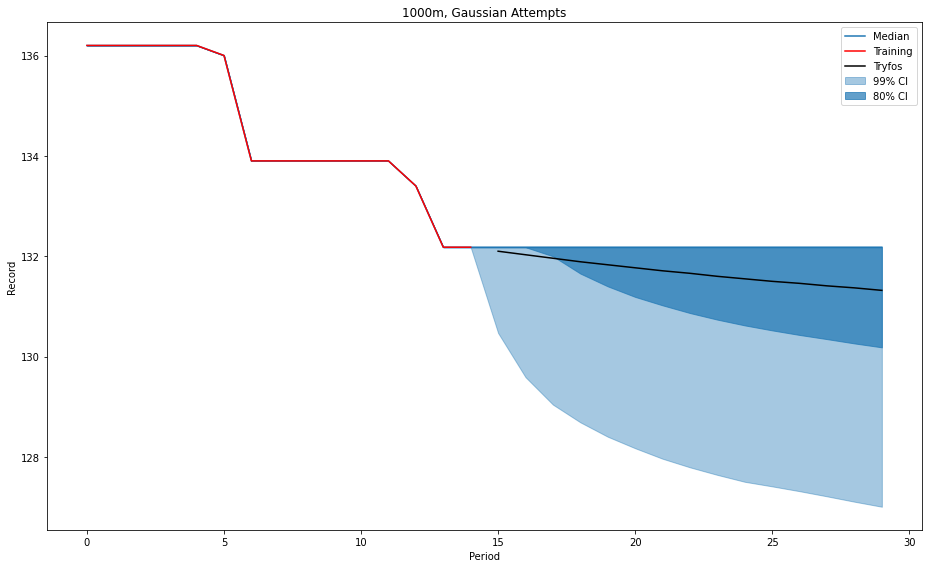

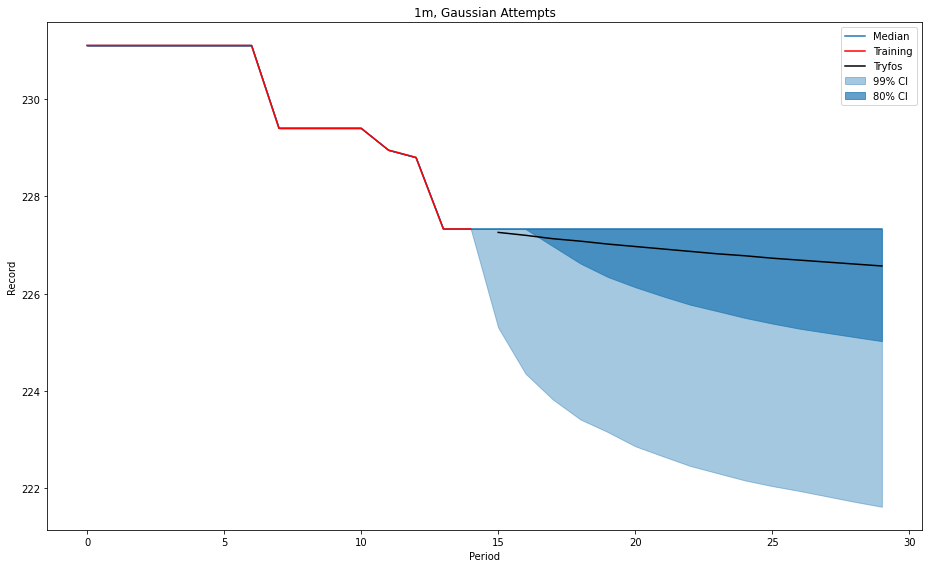

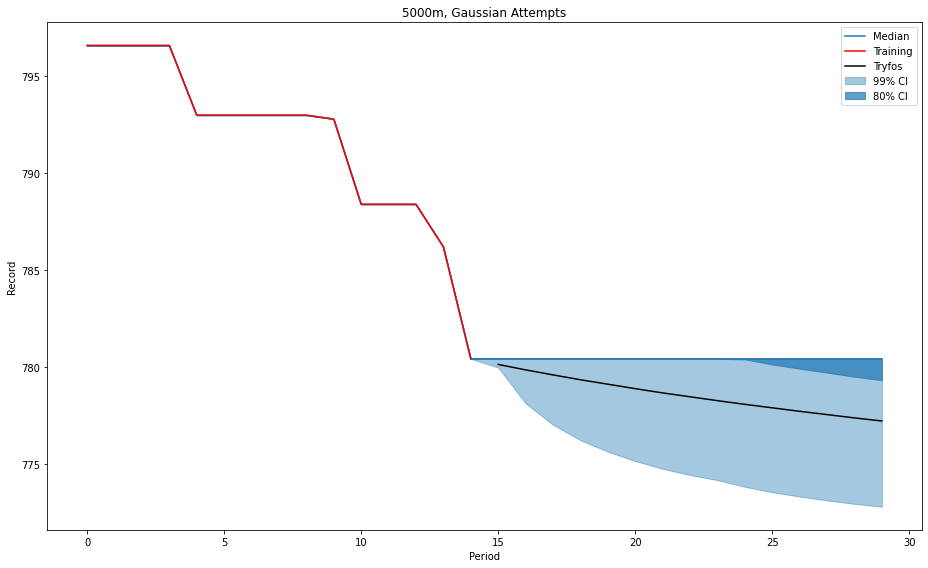

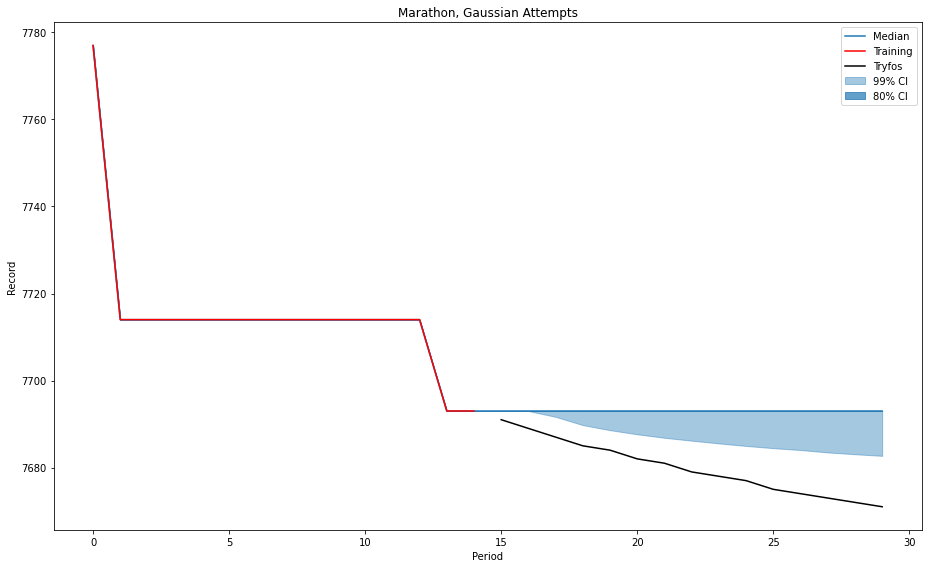

In [5]:
whiches = ["1000m", "1m", "5000m", "Marathon"]
for which in whiches:
    df = pd.read_csv("tryfos_data.csv")
    years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    training_years = years[:15]
    training_records = records[:15]
    tryfos_years = years[15:]
    tryfos_fcast = records[15:]

    model = fm.ForecastModel(training_records, kind="min", train='all', fcast_len=len(tryfos_fcast))
    model.fit(attempts_mean_mu=training_records[0], attempts_mean_sigma=0.05*training_records[0], attempts_stdev_lam=1, chains=3, draws=40000, tune=20000)

    model.draw_forecasts()

    fig = plot_posterior_predictive(model, tryfos_fcast, f"{which}, Gaussian Attempts")
    fig.savefig(f"{which}_gaussian_attempts.png")

# Gumbel

In [3]:
whiches = ["1000m", "1m", "5000m", "Marathon"]
for which in whiches:
    df = pd.read_csv("tryfos_data.csv")
    years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    training_years = years[:15]
    training_records = records[:15]
    tryfos_years = years[15:]
    tryfos_fcast = records[15:]

    model = fm.ForecastModel(training_records, kind="min", train='all', fcast_len=len(tryfos_fcast), attempts="gumbel")
    model.fit(attempts_mean_mu=training_records[0], attempts_mean_sigma=0.05*training_records[0], attempts_stdev_lam=1, chains=3, draws=40000, tune=20000)

    model.draw_forecasts()

    fig = plot_posterior_predictive(model, tryfos_fcast, f"{which}, Gumbel Attempts")
    fig.savefig(f"{which}_gumbel_attempts.png")

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'mu': array(136.2), 'sigma_log__': array(-0.36651292)}

Initial evaluation results:
mu            -2.84
sigma_log__   -1.06
running_max     NaN
Name: Log-probability of test_point, dtype: float64